# Predictive modeling of customer bookings

### Background information of the task

Customers are more empowered than ever because they have access to a wealth of information at their fingertips. This is one of the reasons the buying cycle is very different to what it used to be. Today, if you’re hoping that a customer purchases your flights or holidays as they come into the airport, you’ve already lost! Being reactive in this situation is not ideal; airlines must be proactive in order to acquire customers before they embark on their holiday.

This is possible with the use of data and predictive models. The most important factor with a predictive model is the quality of the data you use to train the machine learning algorithms. For this task, you must manipulate and prepare the provided customer booking data so that you can build a high-quality predictive model.

With your predictive model, it is important to interpret the results in order to understand how “predictive” the data really was and whether we can feasibly use it to predict the target outcome (customers buying holidays). Therefore, you should evaluate the model's performance and output how each variable contributes to the predictive model's power.

### Objectives
- Explore and prepare the dataset
- Train a machine learning model
- Evaluate model and present findings

### Explore and prepare the dataset
First, exploring the dataset to understand the different columns and some basic statistics of the dataset. Then, consider how to prepare the dataset for a predictive model. Extract new features to create in order to make model even better.

# Train a machine learning model
When the data is ready for modelling, train a machine learning model to be able to predict the target outcome, which is a customer making a booking. An algorithm that easily allows to output information about how each variable within the model contributes to its predictive power used be used.

# Evaluate model and present findings
After training model, evaluate how well it performed by conducting cross-validation and outputting appropriate evaluation metrics. Furthermore, create a visualisation to interpret how each variable contributed to the model. Finally, summarise the findings in a single slide. Use the 'PowerPoint Template' to create summary.

### Loading of libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc, ConfusionMatrixDisplay, precision_score, recall_score

In [2]:
df = pd.read_csv('customer_booking.csv', encoding="ISO-8859-1")

In [3]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [4]:
df.shape

(50000, 14)

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

### Check for missing data

In [6]:
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

### Check for statistical summary

In [7]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


### flight_day column convrsion from object to integer data type

In [8]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [9]:
mapping = {'Mon': 1, 'Tue': 2, "Wed": 3, "Thu": 4, "Fri": 5, "Sat": 6, "Sun": 7,}
df['flight_day'] = df['flight_day'].map(mapping)

In [10]:
df['flight_day'].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [11]:
df['sales_channel'].value_counts()

sales_channel
Internet    44382
Mobile       5618
Name: count, dtype: int64

In [12]:
df['channel_sales'] = df['sales_channel'].apply(lambda val: 1 if val == 'Internet' else 0)

In [13]:
df[['sales_channel', 'channel_sales']].value_counts()

sales_channel  channel_sales
Internet       1                44382
Mobile         0                 5618
Name: count, dtype: int64

In [14]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,channel_sales
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0,1
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0,1
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0,1
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0,1
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0,1


In [15]:
df['trip_type'].value_counts()

trip_type
RoundTrip     49497
OneWay          387
CircleTrip      116
Name: count, dtype: int64

### Preprocessing Data for Random Forests
- Handling Categorical Data
- Convert the Categorical values to numerical data using One-hot encoding

In [16]:
trip_types = pd.get_dummies(df['trip_type'], dtype=int)
trip_types.value_counts()

CircleTrip  OneWay  RoundTrip
0           0       1            49497
            1       0              387
1           0       0              116
Name: count, dtype: int64

In [17]:
df['route'].value_counts()

route
AKLKUL    2680
PENTPE     924
MELSGN     842
ICNSIN     801
DMKKIX     744
          ... 
LBUTPE       1
CXRMEL       1
DELKBR       1
KOSSYD       1
MRUXIY       1
Name: count, Length: 799, dtype: int64

In [18]:
routes = pd.get_dummies(df['route'], drop_first=True, dtype=int)
routes.head(3)

,AKLHGH,AKLHND,AKLICN,AKLKIX,AKLKTM,AKLKUL,AKLMRU,AKLPEK,AKLPVG,AKLTPE,...,TGGXIY,TPETRZ,TPETWU,TPEURT,TPEVTE,TRZWUH,TRZXIY,TWUWUH,TWUXIY,URTXIY
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
df['booking_origin'].value_counts()

booking_origin
Australia               17872
Malaysia                 7174
South Korea              4559
Japan                    3885
China                    3387
                        ...  
Panama                      1
Tonga                       1
Tanzania                    1
Bulgaria                    1
Svalbard & Jan Mayen        1
Name: count, Length: 104, dtype: int64

In [20]:
book_origin = pd.get_dummies(df['booking_origin'], drop_first=True, dtype=int)
book_origin.head(3)

,Afghanistan,Algeria,Argentina,Australia,Austria,Bahrain,Bangladesh,Belarus,Belgium,Bhutan,...,Timor-Leste,Tonga,Tunisia,Turkey,Ukraine,United Arab Emirates,United Kingdom,United States,Vanuatu,Vietnam
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
df.dtypes

num_passengers             int64
sales_channel             object
trip_type                 object
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                 int64
route                     object
booking_origin            object
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
booking_complete           int64
channel_sales              int64
dtype: object

### Drop the redundant features: sales_channel, trip_type, route and booking_origin

In [22]:
df.drop(['sales_channel', 'trip_type', 'route', 'booking_origin'], axis=1, inplace=True)

In [23]:
df.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,channel_sales
0,2,262,19,7,6,1,0,0,5.52,0,1
1,1,112,20,3,6,0,0,0,5.52,0,1
2,2,243,22,17,3,1,1,0,5.52,0,1
3,1,96,31,4,6,0,0,1,5.52,0,1
4,2,68,22,15,3,1,0,1,5.52,0,1


In [24]:
df.columns

Index(['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour',
       'flight_day', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete',
       'channel_sales'],
      dtype='object')

### Concatenate the new features: trip_types, routes and book_origin to df

In [25]:
df = pd.concat([df, trip_types, routes, book_origin], axis=1)

In [26]:
df.head(2)

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,...,Timor-Leste,Tonga,Tunisia,Turkey,Ukraine,United Arab Emirates,United Kingdom,United States,Vanuatu,Vietnam
0,2,262,19,7,6,1,0,0,5.52,0,...,0,0,0,0,0,0,0,0,0,0
1,1,112,20,3,6,0,0,0,5.52,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
df['booking_complete']

0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: booking_complete, Length: 50000, dtype: int64

### Train the model

### Extract the features

In [28]:
X = df.drop('booking_complete', axis=1)

### Extract the target value

In [29]:
y = df['booking_complete']

In [30]:
X.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,channel_sales,...,Timor-Leste,Tonga,Tunisia,Turkey,Ukraine,United Arab Emirates,United Kingdom,United States,Vanuatu,Vietnam
0,2,262,19,7,6,1,0,0,5.52,1,...,0,0,0,0,0,0,0,0,0,0
1,1,112,20,3,6,0,0,0,5.52,1,...,0,0,0,0,0,0,0,0,0,0
2,2,243,22,17,3,1,1,0,5.52,1,...,0,0,0,0,0,0,0,0,0,0
3,1,96,31,4,6,0,0,1,5.52,1,...,0,0,0,0,0,0,0,0,0,0
4,2,68,22,15,3,1,0,1,5.52,1,...,0,0,0,0,0,0,0,0,0,0


In [31]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: booking_complete, dtype: int64

### Training and test split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Scaling stardardization

In [33]:
scaler = StandardScaler()

In [34]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Random Forest Classifier and its accuracy

In [35]:
rf = RandomForestClassifier()

In [36]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [37]:
y_pred = rf.predict(X_test)

In [38]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8533


In [39]:
rf.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [40]:
y_pred = rf.predict(X_test_scaled)

In [41]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

In [42]:
print('Accuracy: {}'.format(accuracy))
print()
print('Precision: {}'.format(precision))
print('Recall: {}'.format(recall))

Accuracy: 0.853

Precision: 0.5129533678756477
Recall: 0.13378378378378378


### Cross Validation of the model

In [43]:
#kf = KFold(n_splits=5, shuffle=True, random_state=42)
#rf_cv_score = cross_val_score(rf, X_train_scaled, y_train, cv=kf, scoring='neg_mean_squared_error')
cv_score = cross_val_score(rf, X_train_scaled, y_train, cv = 5)
mean_accuracy = sum(cv_score)/len(cv_score)
mean_accuracy = round((mean_accuracy * 100), 2)
print('Cross Validation accuracy for the {}: {}'.format(rf, cv_score))
print('Accuracy score of the {}: {}'.format(rf, mean_accuracy))

Cross Validation accuracy for the RandomForestClassifier(): [0.8475   0.8505   0.848375 0.846125 0.856   ]
Accuracy score of the RandomForestClassifier(): 84.97


In [44]:
mse = mean_squared_error(y_test, y_pred)
print('Root Mean squared error: {}'.format(mse**0.5))

Root Mean squared error: 0.38340579025361626


Root Mean squared error provides an estimation of how well the model is able to predict the target value (accuracy). The lower the value of the Root Mean Squared Error, the better the model is.

In [45]:
print('{} Results:\n{}'.format(rf, classification_report(y_test, y_pred)))

RandomForestClassifier() Results:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      8520
           1       0.51      0.13      0.21      1480

    accuracy                           0.85     10000
   macro avg       0.69      0.56      0.57     10000
weighted avg       0.81      0.85      0.81     10000



### Confusion Matrix

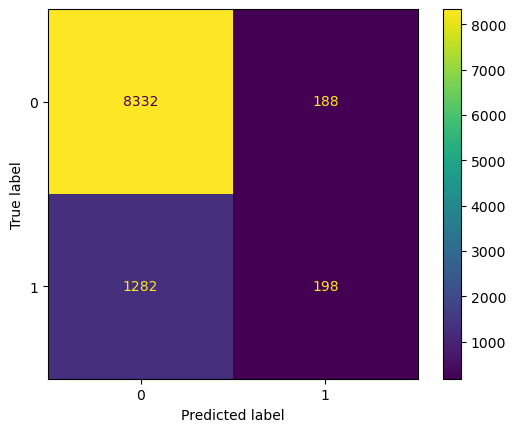

In [46]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

* True Positive (TP) — 214 customers who not complete their bookings and the model predicted they are not.
* True Negative (TN) — 8323 custmers who completed their bookings and model predicted they are.
* False Positive (FP) — 173 customers who completed their booking but the model says they did not complete. It is also called TYPE I error.
* False Negative (FN) — 1266 customers who did complete their bookings and the model predicted they are not. This is also called a TYPE II error.

### Checking for the best features importances

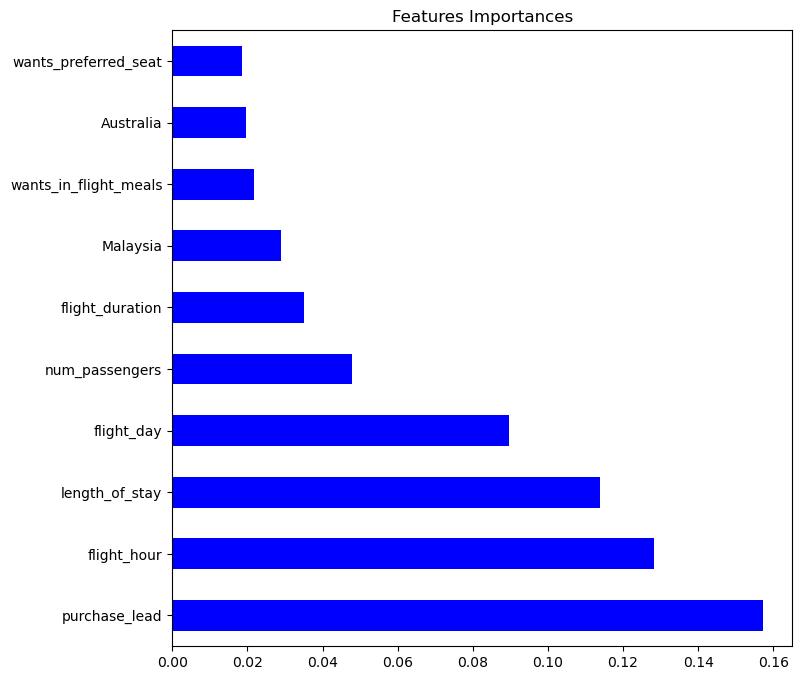

In [47]:
# Create a pd.Series of features importances
plt.figure(figsize=(8, 8))
importances = pd.Series(data=rf.feature_importances_,
                        index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()
 
# Draw a horizontal barplot of importances_sorted
importances_sorted.nlargest(10).plot(kind='barh', color='blue')
plt.title('Features Importances')
plt.show()

### Predicting probability

In [48]:
y_pred_prob = rf.predict_proba(X_test_scaled)[:, 1]
print(y_pred_prob[0])

0.24


### Plotting the ROC curve

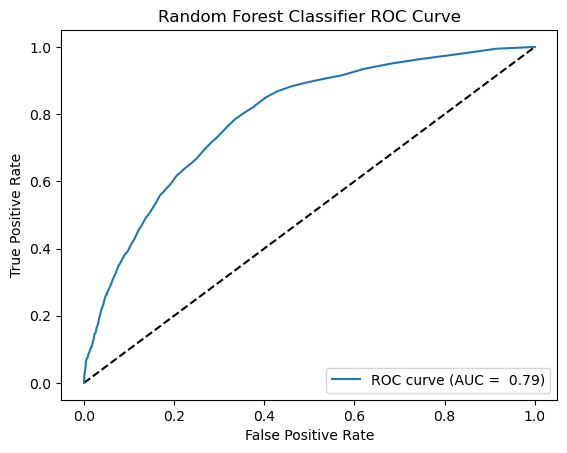

In [49]:
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob) # Calculate the ROC curve
roc_auc = auc(fpr, tpr) # Calculate the AUC (Area Under the Curve)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc: .2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Classifier ROC Curve')
plt.legend(loc='lower right')
plt.show()

## Summary
* In this project I evaluate  classification algorithm(Random Forest) to predict the customers who complete their booking. The problem is a standard binary classification dataset and has two classes. Model performance was seen in detail using classification report and the metrics are the accuracy, confusion matrix and Receiver Operating Characteristic(ROC). The accuracy score is achieved by Random Forest Classifier which is approximately 86%.